## Actividad modulo #29 - Clustering

In [1]:
# Impot Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import os

# Librerias para Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform

#### I took the dataset from:
- https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

#### Here is the Data Dictionary for the Credit Card dataset :

- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

#### Exploratory Data Analysis y Analisis Univariado

In [2]:
# import dataset
os.chdir('E:\WORK IN PROGRESS\Data Analytics course\parte 2 python\week 29')
# Se usa la funcion read_csv para leer el archivo . csv
# Validar los campos y sus rangos
df = pd.read_csv('CC_GENERAL.csv')

df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df = df.round(4)
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.9007,0.8182,95.40,0.00,95.4,0.0000,0.1667,0.0000,0.0833,0.0000,0,2,1000.0,201.8021,139.5098,0.0000,12
1,C10002,3202.4674,0.9091,0.00,0.00,0.0,6442.9455,0.0000,0.0000,0.0000,0.2500,4,0,7000.0,4103.0326,1072.3402,0.2222,12
2,C10003,2495.1489,1.0000,773.17,773.17,0.0,0.0000,1.0000,1.0000,0.0000,0.0000,0,12,7500.0,622.0667,627.2848,0.0000,12
3,C10004,1666.6705,0.6364,1499.00,1499.00,0.0,205.7880,0.0833,0.0833,0.0000,0.0833,1,1,7500.0,0.0000,NaN,0.0000,12
4,C10005,817.7143,1.0000,16.00,16.00,0.0,0.0000,0.0833,0.0833,0.0000,0.0000,0,1,1200.0,678.3348,244.7912,0.0000,12


In [4]:
df.shape

(8950, 18)

#### insights:
- la primera c0lumna se puede eliminar (ID column).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### Insights:
- Todas las columnas estan ya en formato numerico
- Dos columna tienen valores nulos: "Minimum_payments"
- No es necesario revisar el balanceo de las clases porque no hay variables categoricas

In [7]:
df.nunique()

CUST_ID                             8950
BALANCE                             8865
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8709
MINIMUM_PAYMENTS                    8633
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.0000,128.281950,873.38525,2054.140000,19043.1386
BALANCE_FREQUENCY,8950.0,0.877272,0.236906,0.0000,0.888900,1.00000,1.000000,1.0000
PURCHASES,8950.0,1003.204834,2136.634782,0.0000,39.635000,361.28000,1110.130000,49039.5700
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.0000,0.000000,38.00000,577.405000,40761.2500
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.0000,0.000000,89.00000,468.637500,22500.0000
CASH_ADVANCE,8950.0,978.871113,2097.163877,0.0000,0.000000,0.00000,1113.821175,47137.2118
PURCHASES_FREQUENCY,8950.0,0.490349,0.401373,0.0000,0.083300,0.50000,0.916700,1.0000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202455,0.298338,0.0000,0.000000,0.08330,0.300000,1.0000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364438,0.397449,0.0000,0.000000,0.16670,0.750000,1.0000
CASH_ADVANCE_FREQUENCY,8950.0,0.135142,0.200122,0.0000,0.000000,0.00000,0.222200,1.5000


In [9]:
cols=df.columns.to_list()
cols.remove('CUST_ID')
cols

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

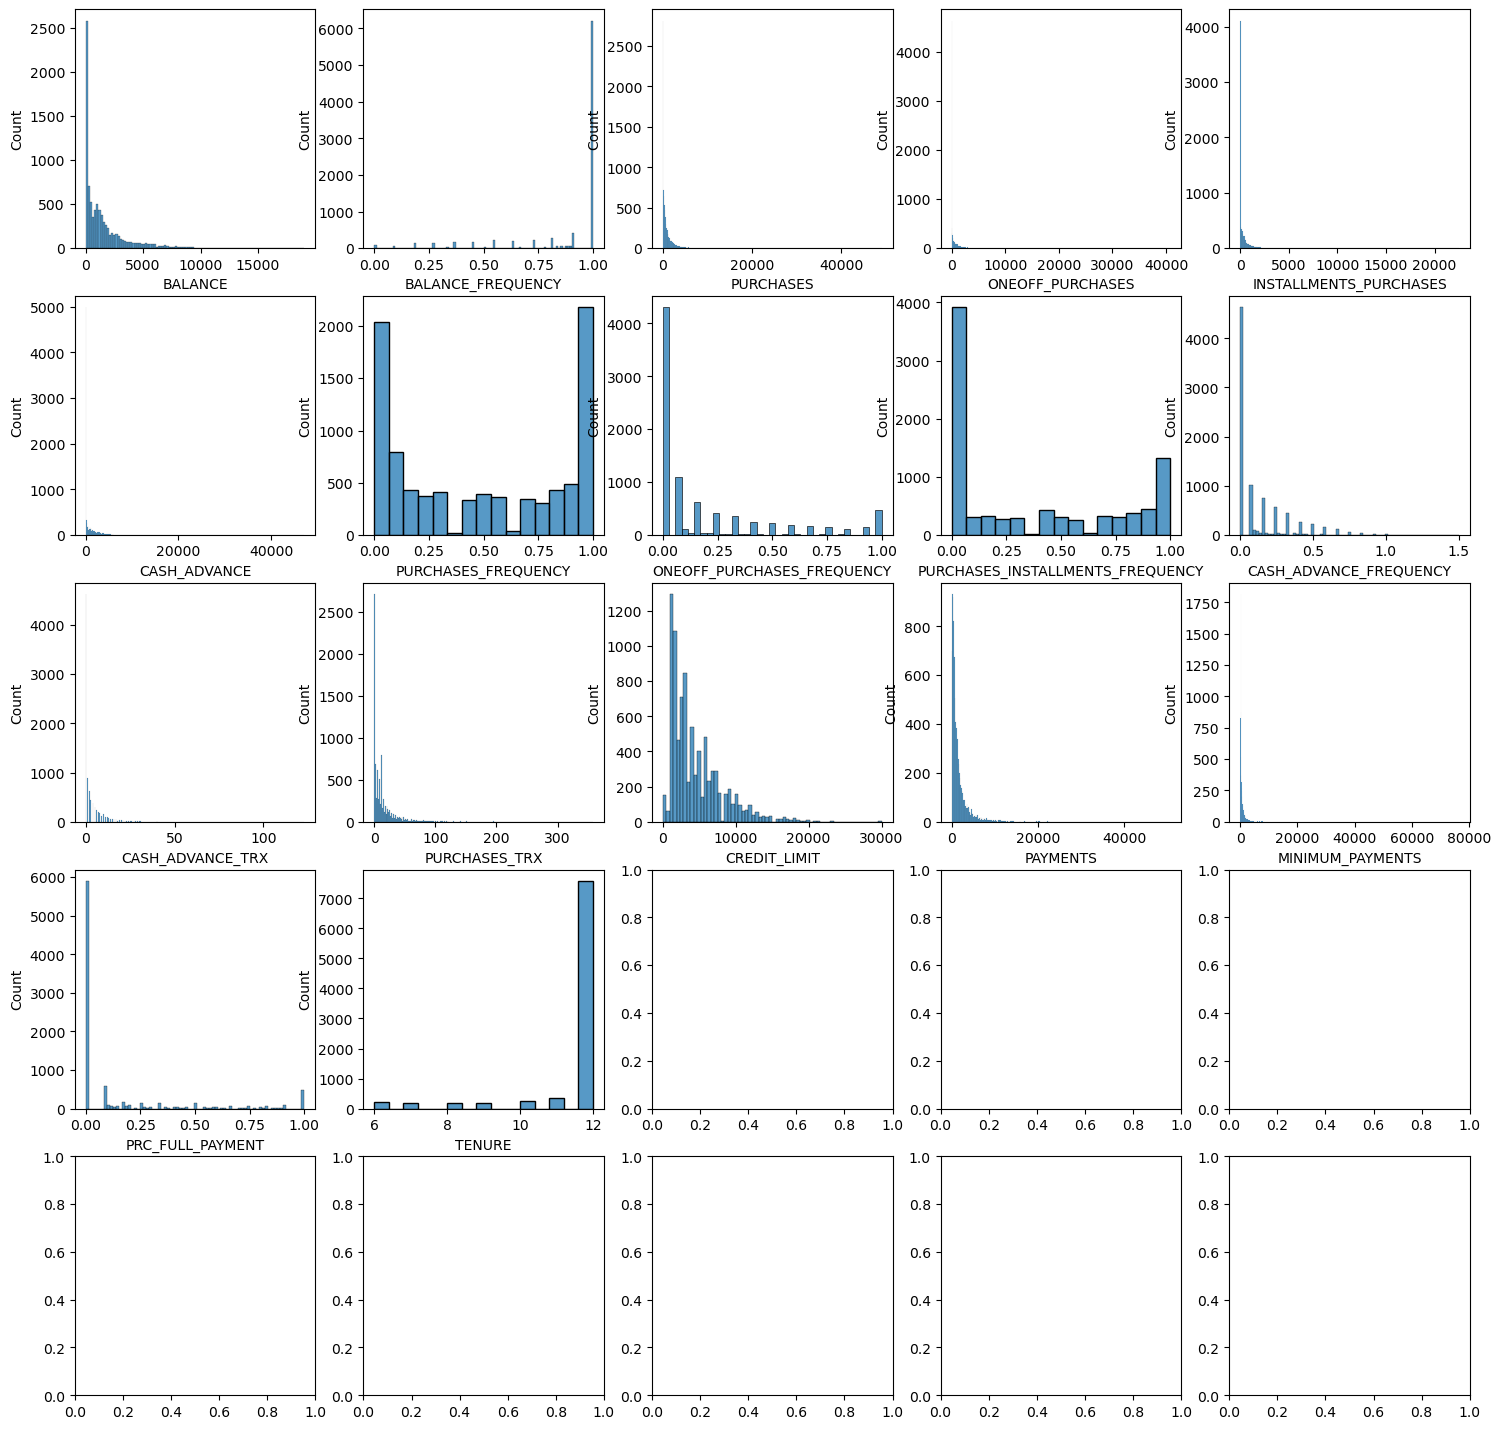

In [10]:
# Grafica exploratoria de todas las columnas
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(18,18))
for i,column in enumerate(cols):
    sns.histplot(df[column],ax=axes[i//5,i%5],kde=False)

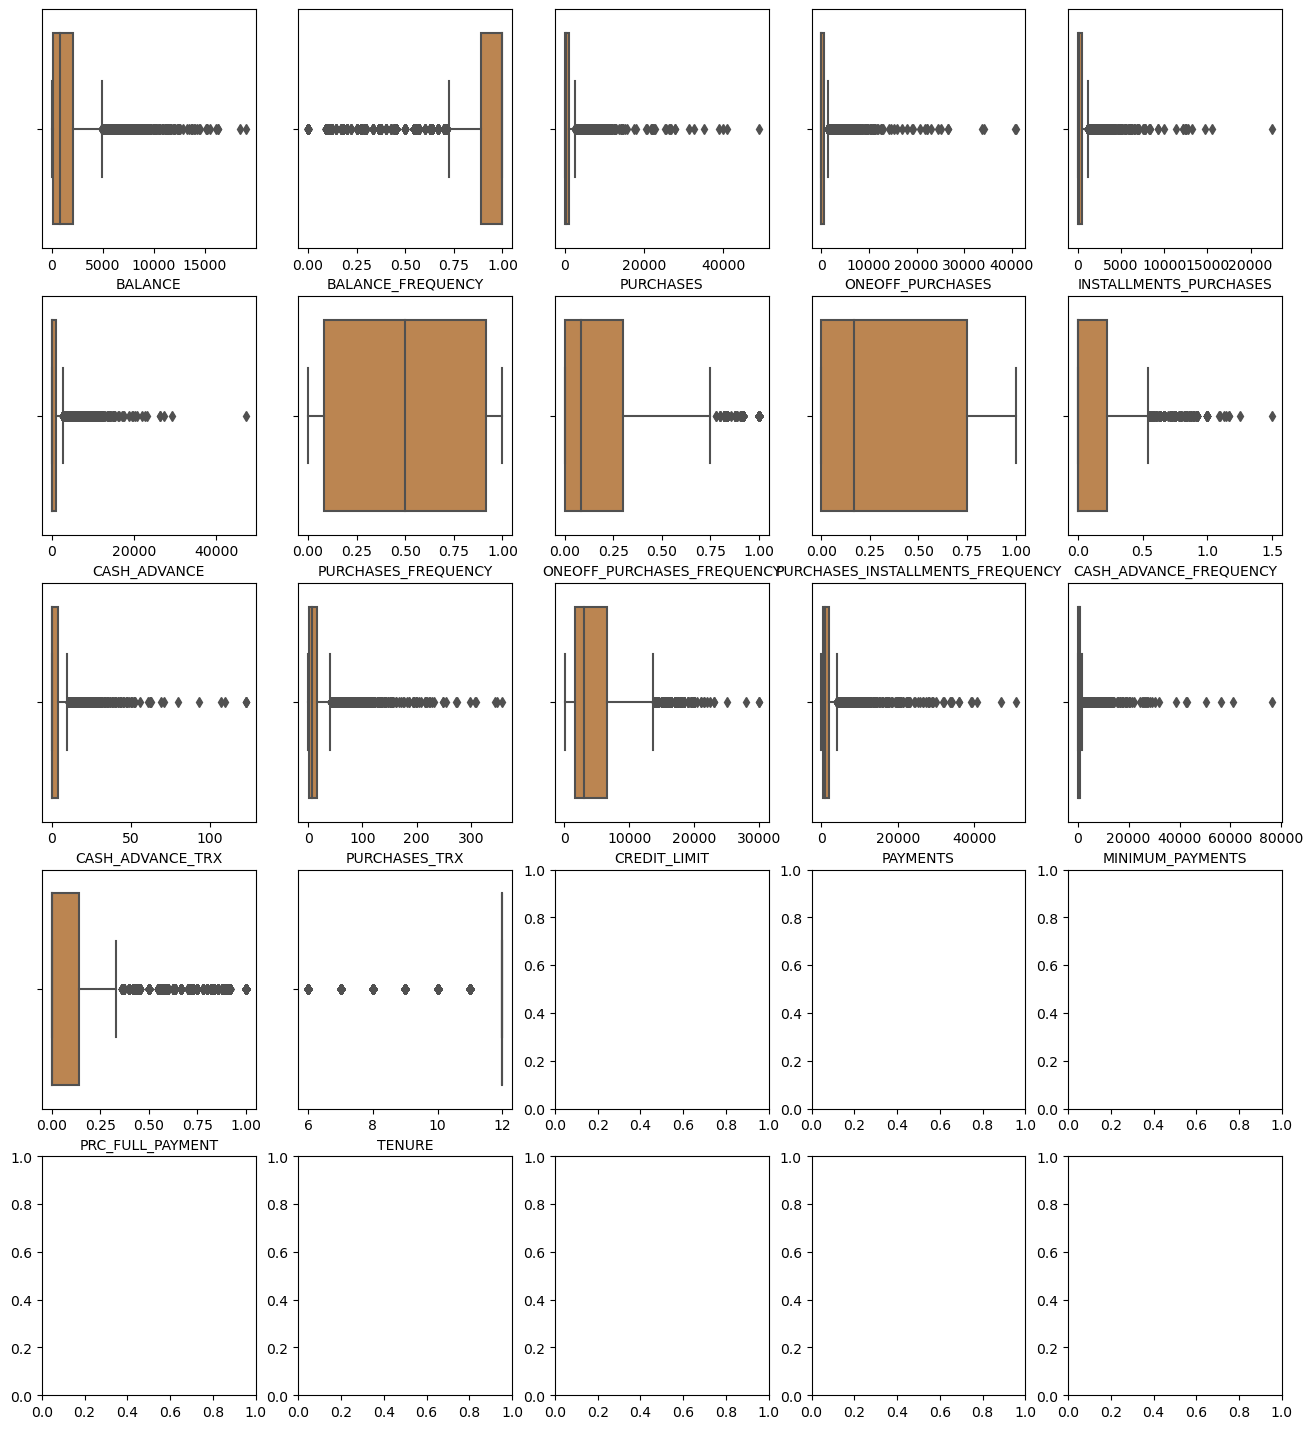

In [11]:
fig,axes= plt.subplots(nrows=5,ncols=5, figsize=(16,18))
for i,column in enumerate (cols):
    sns.boxplot(x=df[column], color='peru',ax=axes[i//5,i%5])

#### Insights:
- La mayoria (por no decir todas) de las variables tienen un sesgo considerable con uotliers.
- Se puede realizar una transformacion con log.


### Correlación

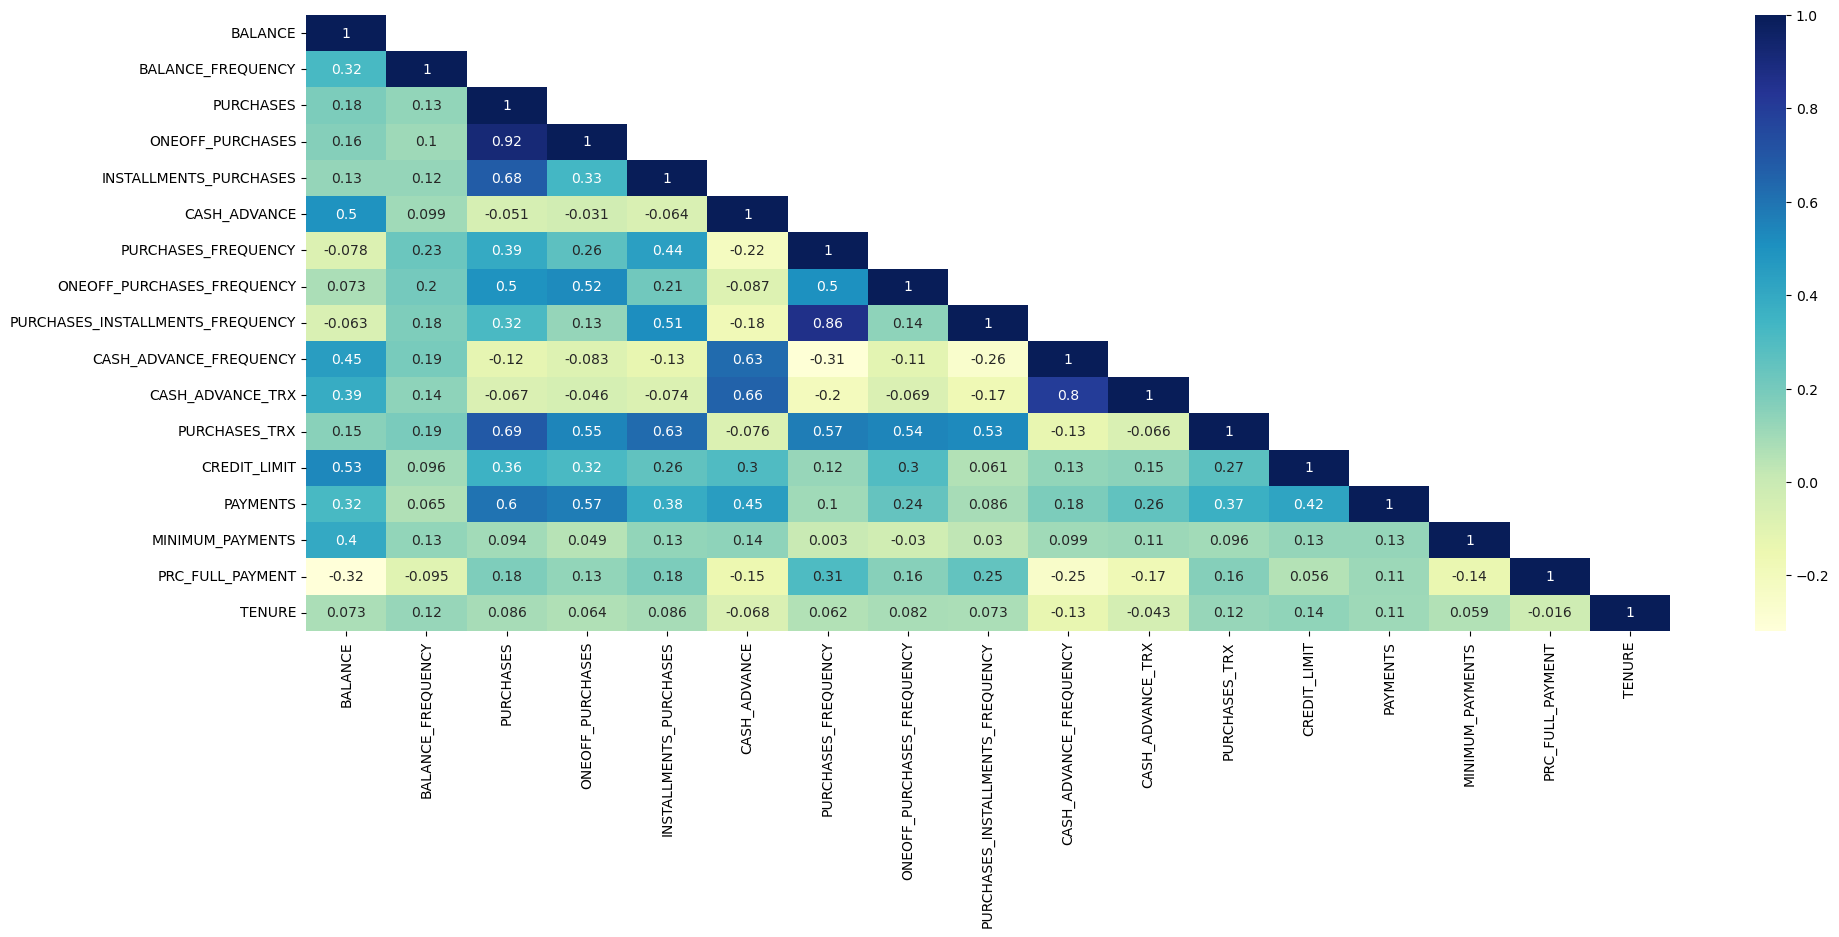

In [12]:
# Grafica de correlacion
plt.figure(figsize=(22,8))
corr_df = corr = df.corr(method='pearson')
df_lt= corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap=sns.heatmap(df_lt, cmap='YlGnBu',annot=True)

# Insights:
- Hay dos coeficientes que indican que hay varaibles que estan altamente correlacionadas:
    * "PURCHASES" y "ONEOFF_PURCHASES" (0.92)
    * "PURCHASES_FREQUENCY" y "PURCHASES_INSTALLMENTS_FREQUENCY" (0.86)

### Feature engineering

In [13]:
df2 = df.copy()

In [14]:
df3 = df.copy()

- Eliminación de columna (Id)

In [15]:
df2.drop(columns=['CUST_ID'],inplace=True)
df2.sample(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5304,11.1169,1.0000,168.00,0.00,168.00,0.0000,1.0000,0.0000,1.0000,0.0000,0,12,5500.0,154.7052,157.7846,0.0833,12
7774,1420.6564,0.8750,0.00,0.00,0.00,1773.7695,0.0000,0.0000,0.0000,0.2500,4,0,2500.0,316.4652,344.6628,0.0000,8
3391,962.8555,0.9091,1839.69,1501.05,338.64,0.0000,0.8333,0.2500,0.5833,0.0000,0,19,5000.0,1331.3054,247.5880,0.0000,12
8320,1079.1067,1.0000,0.00,0.00,0.00,390.4850,0.0000,0.0000,0.0000,0.4167,5,0,1200.0,552.5708,313.8081,0.0000,12
4348,5259.1404,0.8889,2659.35,813.00,1846.35,4851.3920,0.8889,0.2222,0.7778,0.3333,34,38,6000.0,2249.6124,4538.5426,0.0000,9


- Imputacion de datos para las dos columnas con  valores nulos

In [16]:
df2.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
print(df2.columns[df2.isnull().any()])

Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')


In [18]:
fill_col=df2.columns[df2.isnull().any()].to_list()

In [19]:
for col in fill_col:
    df2[col].fillna(value=df2[col].mean(),inplace=True)

In [20]:
df2.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

- Transformación logarítmica para todas las columnas del dataframe

In [21]:
for col in cols:
    df2[col]=np.log(df2[col]+1)

# Ahora, Todas las columnas de df2 estan en logaritmo

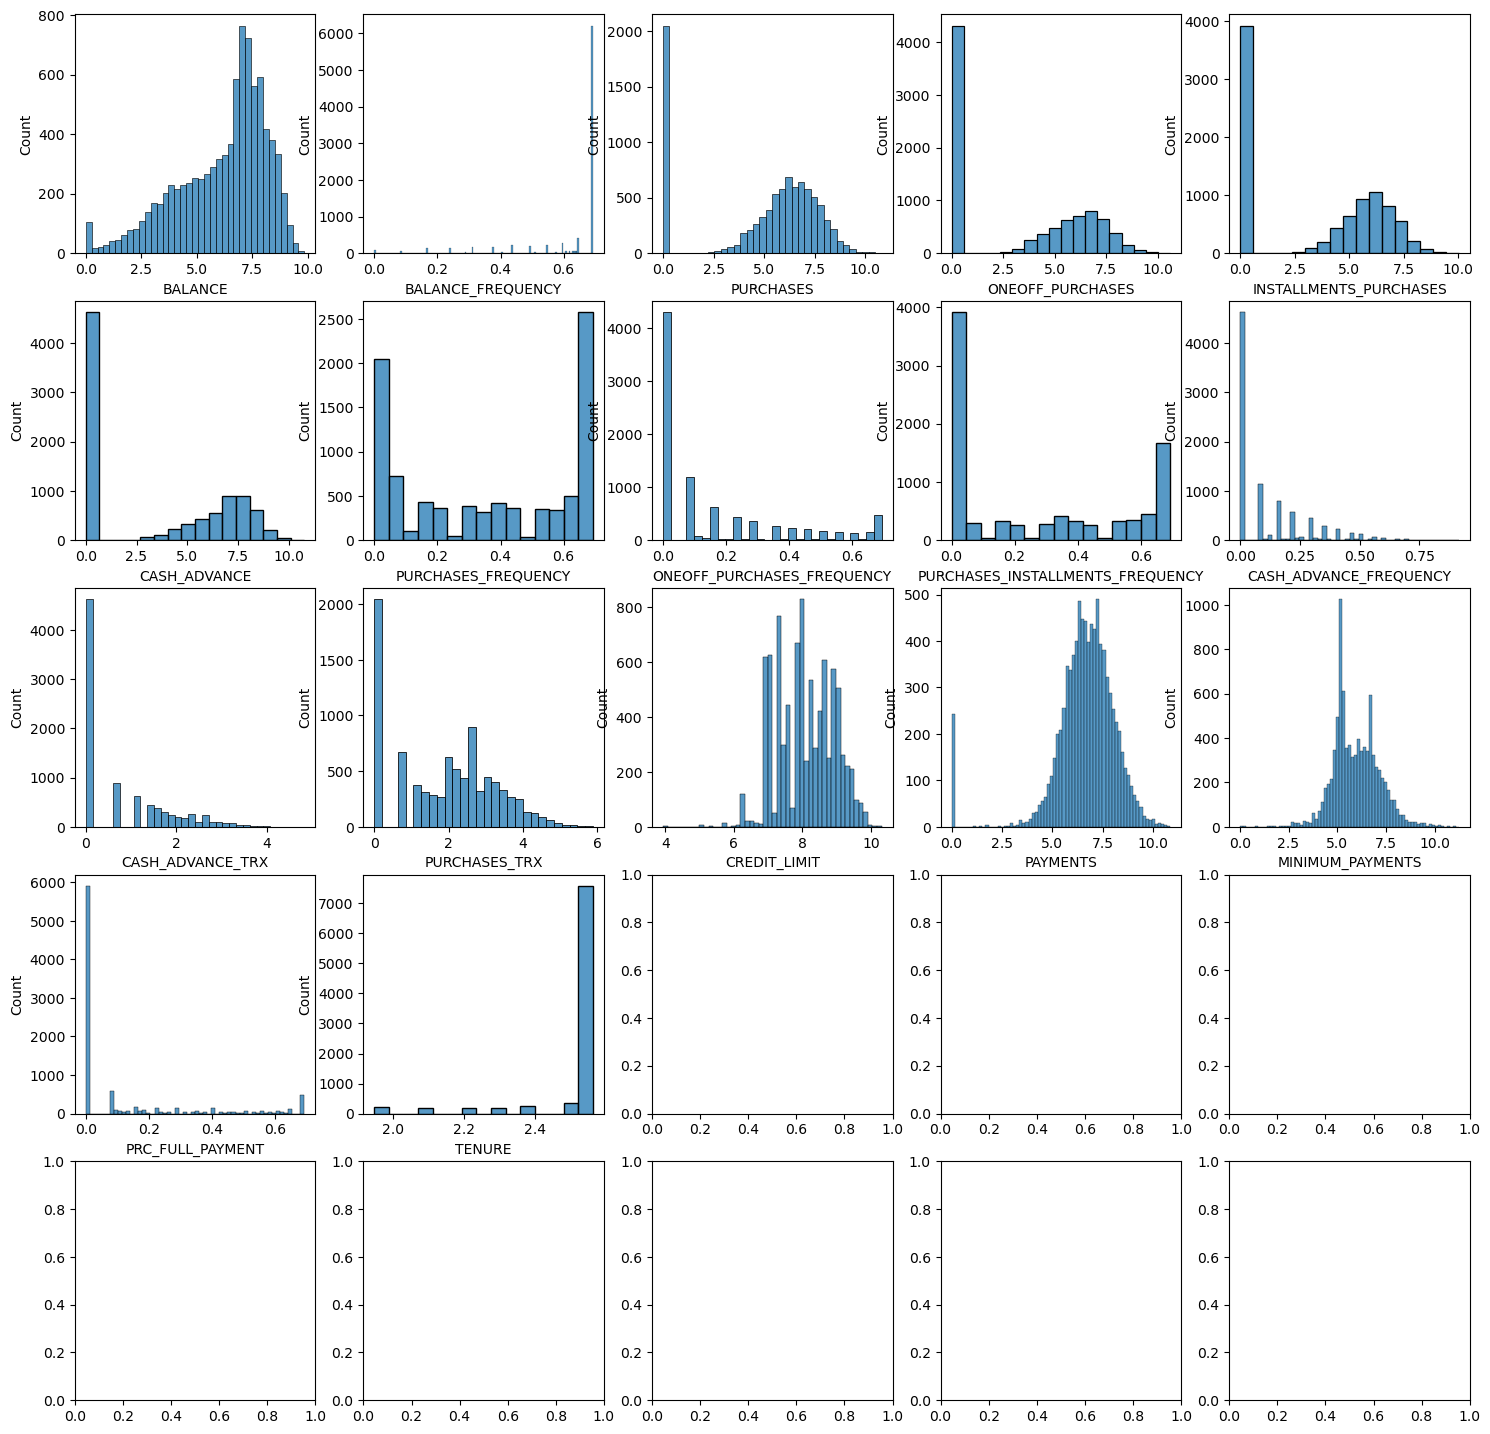

In [22]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(18,18))
for i,column in enumerate(cols):
    sns.histplot(df2[column],ax=axes[i//5,i%5],kde=False)

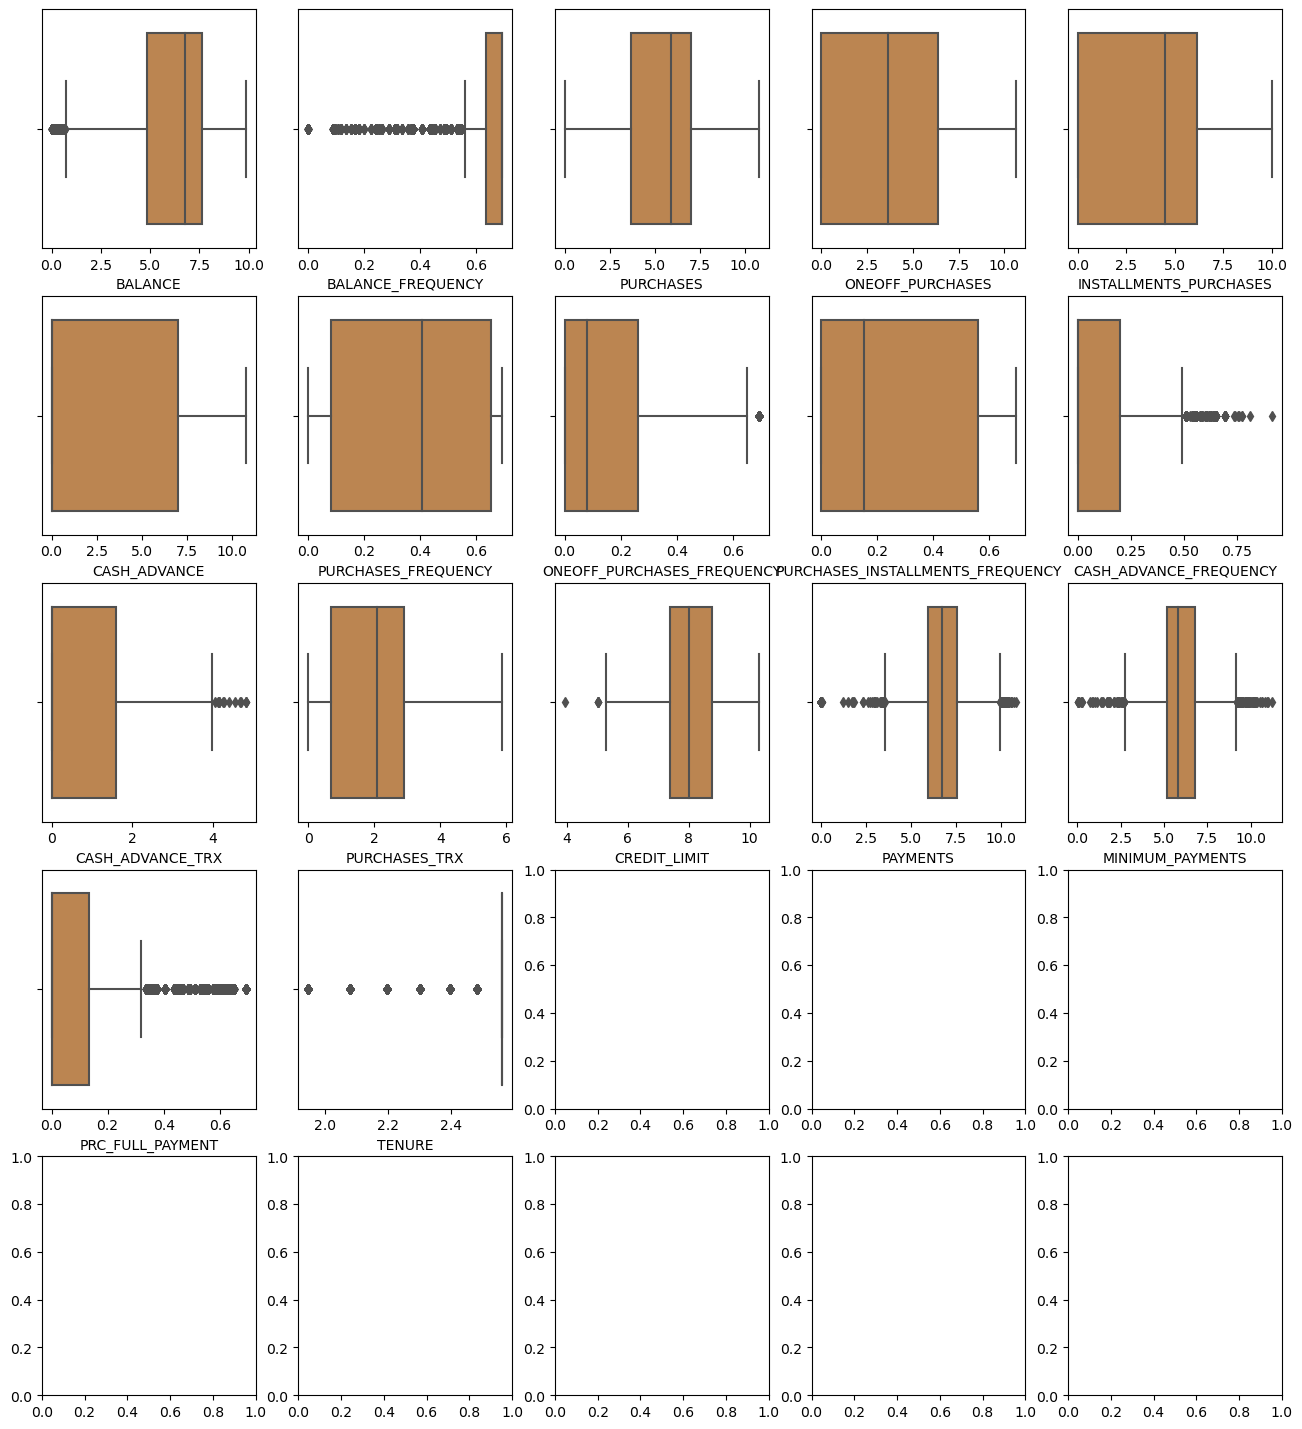

In [23]:
fig,axes= plt.subplots(nrows=5,ncols=5, figsize=(16,18))
for i,column in enumerate (cols):
    sns.boxplot(x=df2[column], color='peru',ax=axes[i//5,i%5])

#### Insights:
- Aún haciendo la transformación logarítmica, hay variables con outliers y sesgos considerables.

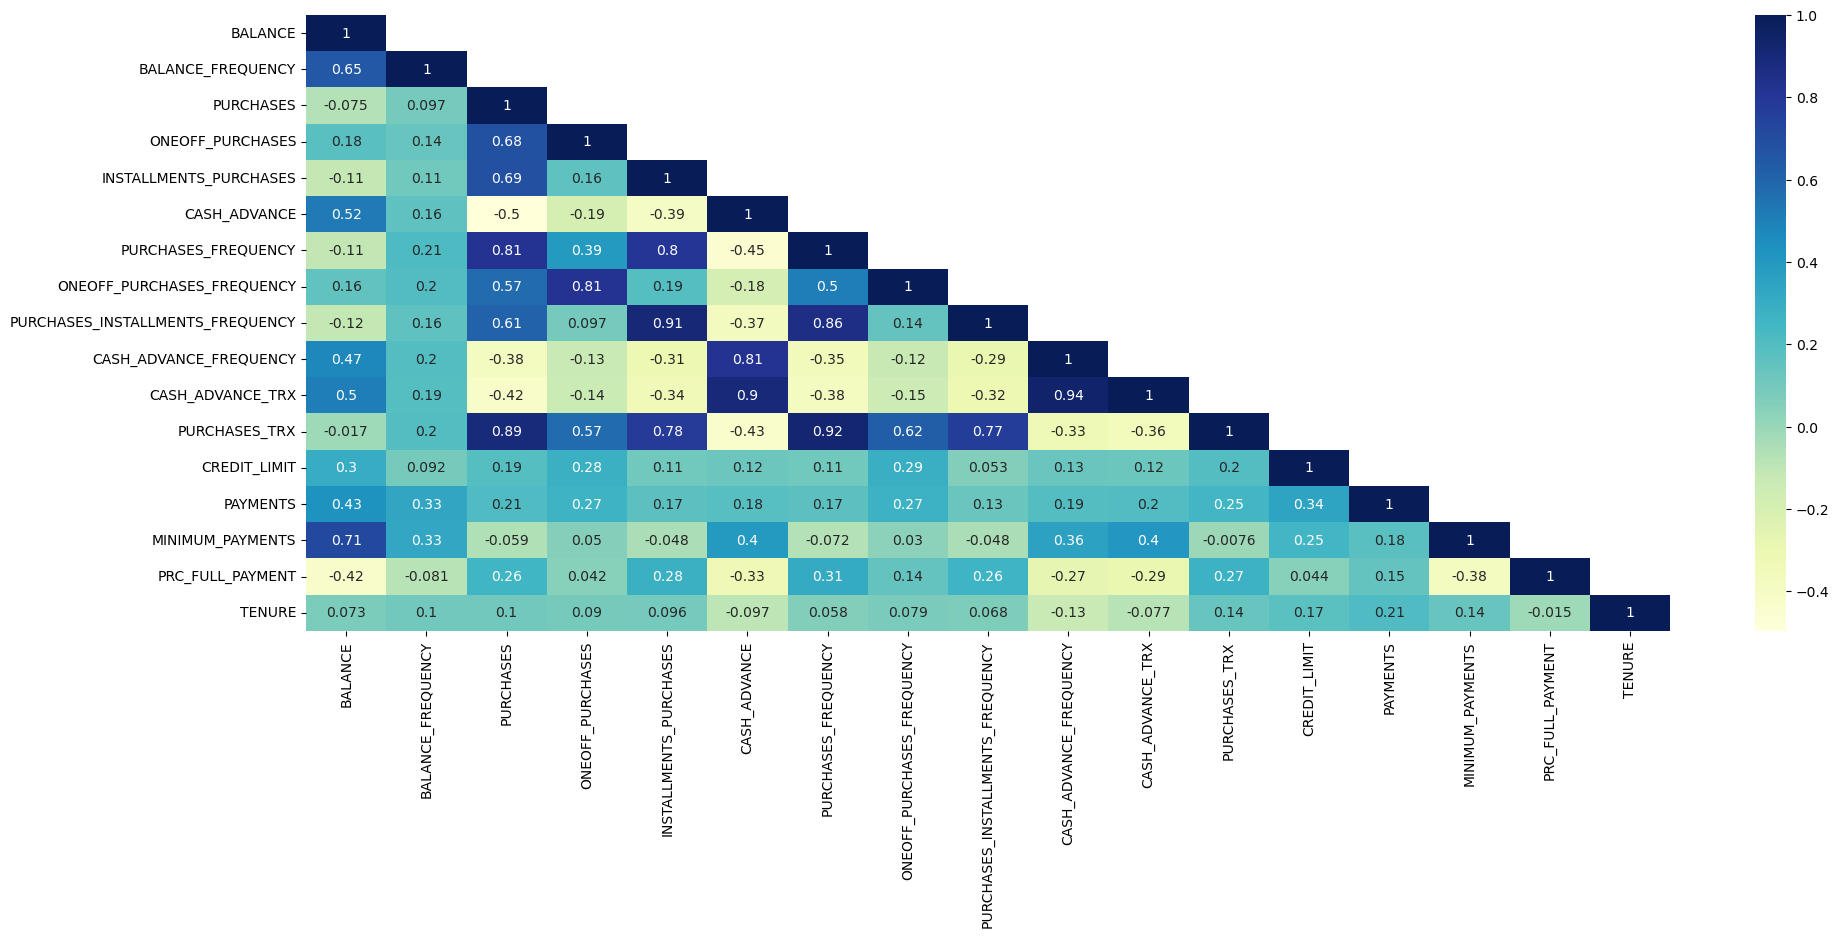

In [24]:
# Grafica de correlacion
# Dado que se hicieron varias transformaciones conviene revisar de nuevo la correlacion.
plt.figure(figsize=(22,8))
corr_df = corr = df2.corr(method='pearson')
df_lt= corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap=sns.heatmap(df_lt, cmap='YlGnBu',annot=True)

#### Insights:
- Dado que existe multioclinearidad entre varias variables se procede a eliminar algunas de ellas.

In [25]:
drop_cols=['PURCHASES_TRX','CASH_ADVANCE_TRX','PURCHASES_INSTALLMENTS_FREQUENCY']
df2.drop(columns=drop_cols,inplace=True)

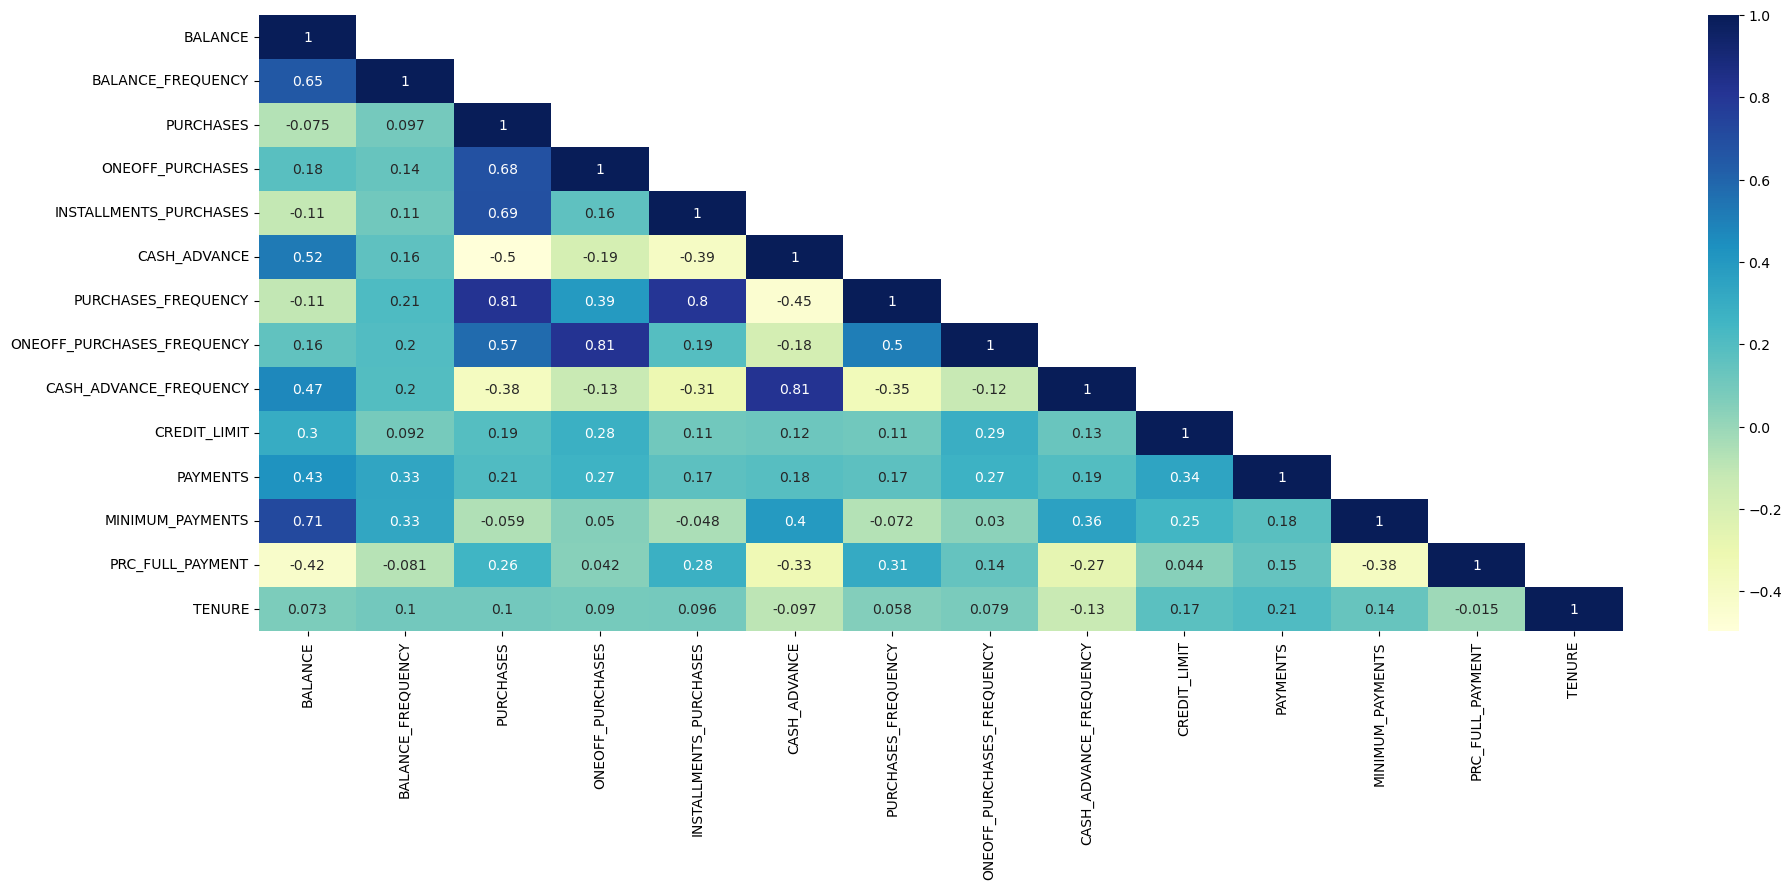

In [26]:
# Grafica de correlacion
# Dado que se hicieron varias transformaciones conviene revisar de nuevo la correlacion.
plt.figure(figsize=(22,8))
corr_df = corr = df2.corr(method='pearson')
df_lt= corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap=sns.heatmap(df_lt, cmap='YlGnBu',annot=True)

- Escalamiento

In [27]:
# Escalamiento
# Se aplica el escalamiento tipo z-score antes del clustering
from scipy.stats import zscore
df2 = df2.apply(zscore)

In [28]:
# Se validan los nuevos rangos, escalados
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,-1.714829e-16,1.000056,-3.060633,-0.645563,0.303937,0.728427,1.834341
BALANCE_FREQUENCY,8950.0,7.907269e-16,1.000056,-4.172328,0.108052,0.492701,0.492701,0.492701
PURCHASES,8950.0,6.986342e-17,1.000056,-1.679855,-0.409715,0.340373,0.724613,2.023087
ONEOFF_PURCHASES,8950.0,0.000000e+00,1.000056,-0.987090,-0.987090,0.141485,0.972218,2.283062
INSTALLMENTS_PURCHASES,8950.0,1.034058e-16,1.000056,-1.087454,-1.087454,0.372196,0.908121,2.163264
CASH_ADVANCE,8950.0,-8.097805e-17,1.000056,-0.930733,-0.930733,-0.930733,1.036809,2.086805
PURCHASES_FREQUENCY,8950.0,1.341695e-16,1.000056,-1.302784,-1.014248,0.159389,1.043403,1.196817
ONEOFF_PURCHASES_FREQUENCY,8950.0,-6.351220e-17,1.000056,-0.732464,-0.732464,-0.363169,0.478478,2.466756
CASH_ADVANCE_FREQUENCY,8950.0,3.969512e-17,1.000056,-0.724345,-0.724345,-0.724345,0.556078,5.122777
CREDIT_LIMIT,8950.0,-1.282946e-15,1.000056,-5.079426,-0.874201,-0.107577,0.835591,2.701494


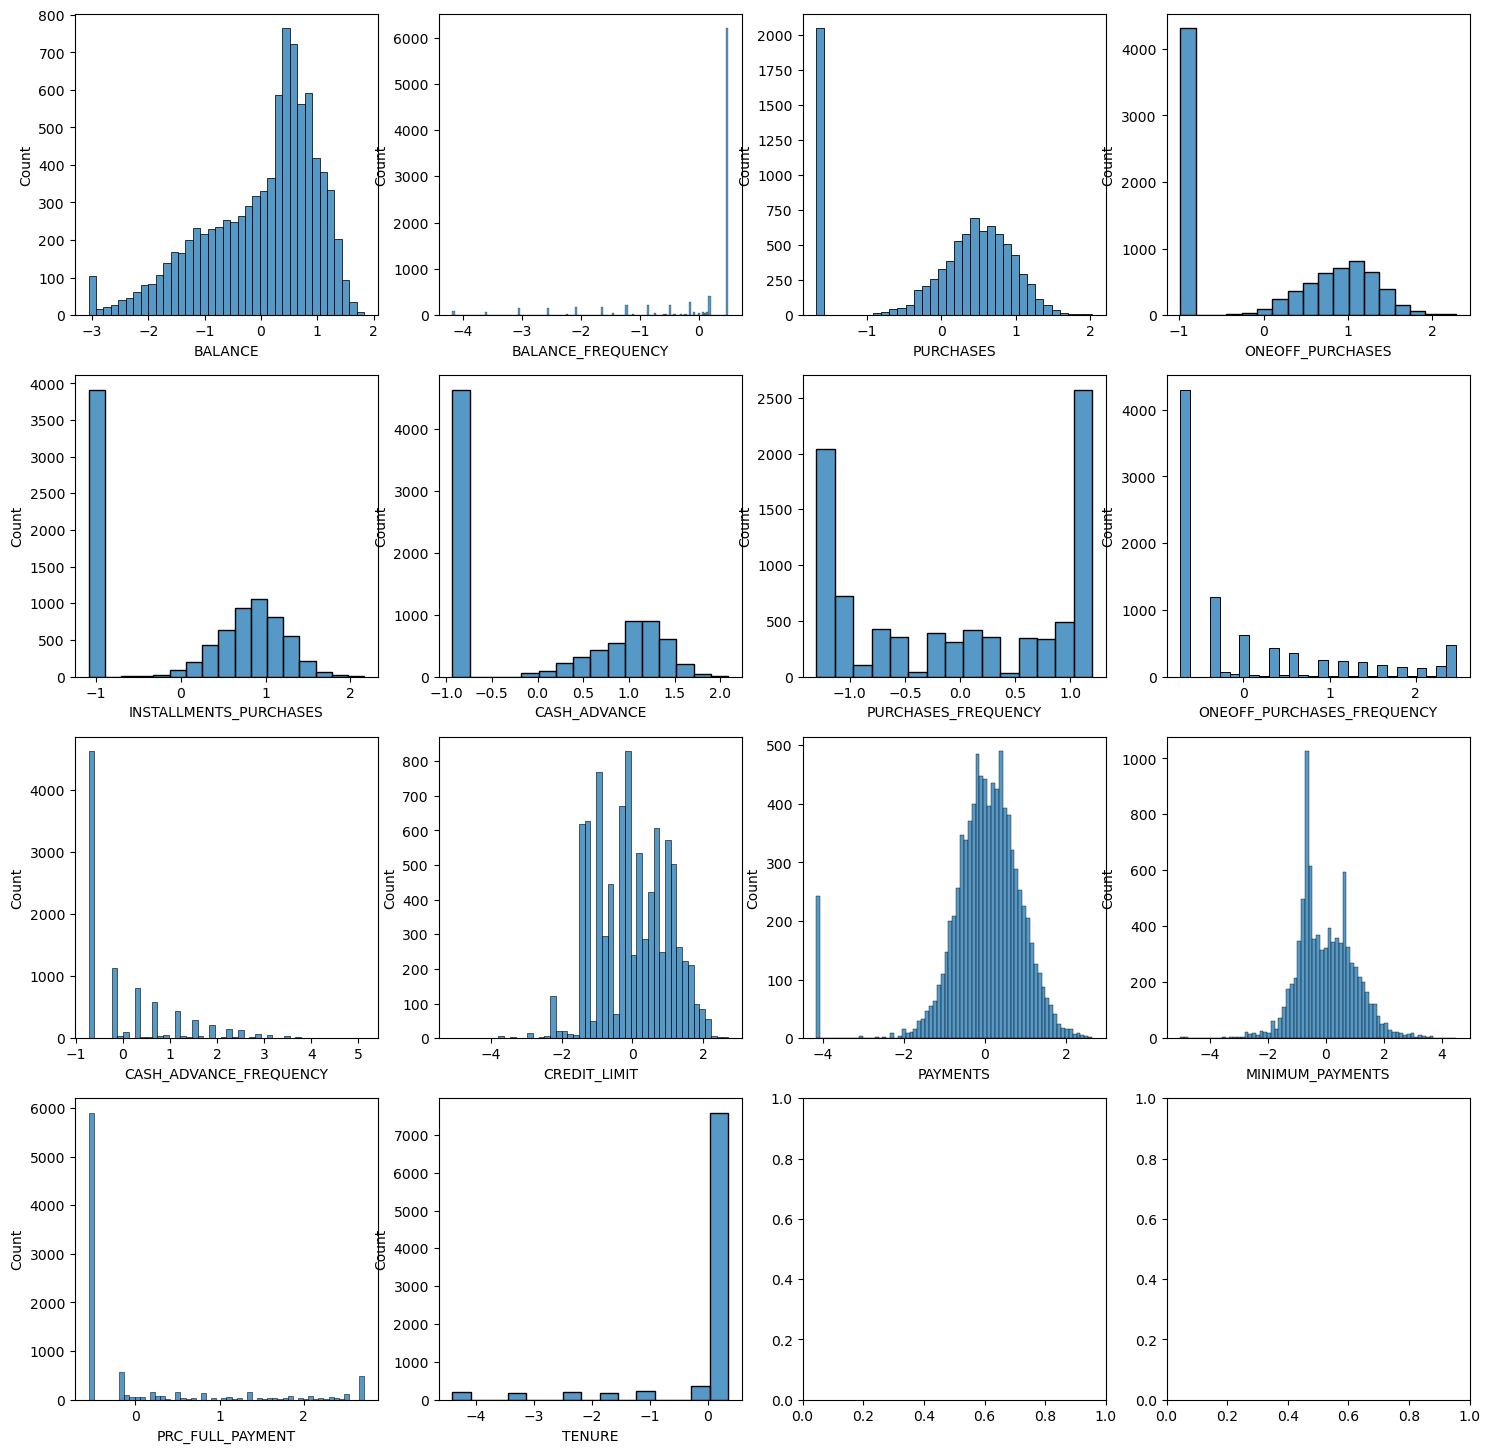

In [29]:
# Grafica exploratoria de todas las columnas
col_df2=df2.columns.to_list()

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,18))
for i,column in enumerate(col_df2):
    sns.histplot(df2[column],ax=axes[i//4,i%4],kde=False)

### Recapitulando las transformaciones hechas:
- Se eliminaron 4 columnas:
    - 'CUST_ID, PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'PURCHASES_INSTALLMENTS_FREQUENCY'
- A las columnas con valores nulos ('CREDIT_LIMIT', 'MINIMUM_PAYMENTS') se les imputó la media correspondiente a esa misma columna.
- A todas las columnas del dataframe se les realizó una transformación logarítmica.
- Finalmente, se hizo un escalonamiento a todos los datos.

### Modelo de Clustering K-Means

Text(0.5, 1.0, 'Resultados KMeans')

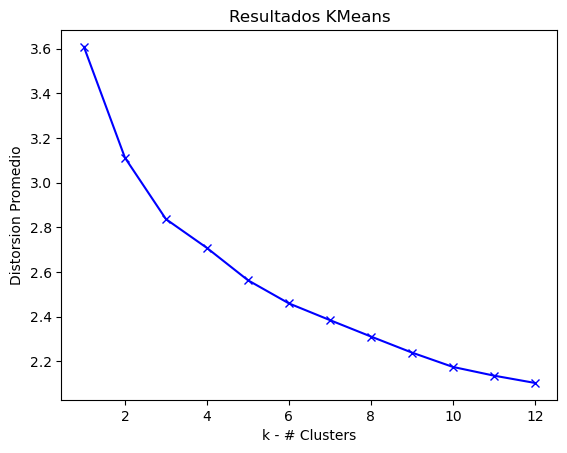

In [30]:
# Buscando el optimo numero de Clusters
from scipy.spatial.distance import cdist
clusters=range(1,13)
meanDistortion=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df2)
    prediction=model.predict(df2)
    # Generates the average distortion calculation for each one of the cluster points
    # Compares each data point with the cluster centers and obtains the minimum and divides it for mydata
    meanDistortion.append(sum(np.min(cdist(df2,model.cluster_centers_,'euclidean'), axis=1))/df2.shape[0])

#Plots the scree graphic
# Distortion decreases as the number ofclusters increase, until the number of clusters = number of points
plt.plot(clusters, meanDistortion, 'bx-')
plt.xlabel('k - # Clusters')
plt.ylabel('Distorsion Promedio')
plt.title ('Resultados KMeans')

In [31]:
prediction

array([1, 5, 9, ..., 7, 7, 7])

#### Main Insights:
- Por inspeccion visual, un numero de 3 clusters parece el indicado, y donde se forma el'codo' en el grafico.
- Se hizo un analisis entre 1 a 12 clusters

In [32]:
# Se genera el numero de clusters = 3
# El parametro n_init significa que se probara con 15 diferentes inicializaciones y se tomaran las mejores
kmeans = KMeans(n_clusters=3,n_init=15,random_state=1)
kmeans.fit(df2)

KMeans(n_clusters=3, n_init=15, random_state=1)

In [33]:
# Se genera un dataframe para los labels de los clusters y se los convierte en categorias
# Asi, cada registro tiene un cluster asociado
df_labels=pd.DataFrame(kmeans.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [34]:
# Hace un union del dataframe de las etiquetas con el de datos
df_labeled = df3.join(df_labels)

In [35]:
df_labeled.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,C10001,40.9007,0.8182,95.40,0.00,95.4,0.0000,0.1667,0.0000,0.0833,0.0000,0,2,1000.0,201.8021,139.5098,0.0000,12,2
1,C10002,3202.4674,0.9091,0.00,0.00,0.0,6442.9455,0.0000,0.0000,0.0000,0.2500,4,0,7000.0,4103.0326,1072.3402,0.2222,12,0
2,C10003,2495.1489,1.0000,773.17,773.17,0.0,0.0000,1.0000,1.0000,0.0000,0.0000,0,12,7500.0,622.0667,627.2848,0.0000,12,1
3,C10004,1666.6705,0.6364,1499.00,1499.00,0.0,205.7880,0.0833,0.0833,0.0000,0.0833,1,1,7500.0,0.0000,NaN,0.0000,12,0
4,C10005,817.7143,1.0000,16.00,16.00,0.0,0.0000,0.0833,0.0833,0.0000,0.0000,0,1,1200.0,678.3348,244.7912,0.0000,12,0


In [36]:
df_labeled.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'labels'],
      dtype='object')

In [37]:
# Division de los clusters
# Numero de registros con cada uno de los clusters
df_labeled['labels'].value_counts()

1    3407
0    2842
2    2701
Name: labels, dtype: int64

### Visualización de los resultados del modelo de clustering: bar plots y clases – identificación y perfilamiento de clases

Text(0.5, 1.0, 'KMeans')

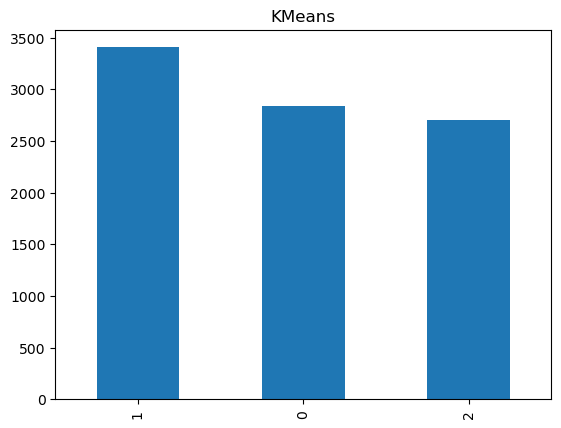

In [38]:
# Grafico de clusters por registro
df_labeled['labels'].value_counts().plot(kind='bar').set_title('KMeans')

In [39]:
cols_final = df_labeled.columns.to_list()
cols_final.remove('labels')
cols_final.remove('CUST_ID')
print(cols_final)
print(len(cols_final))

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
17


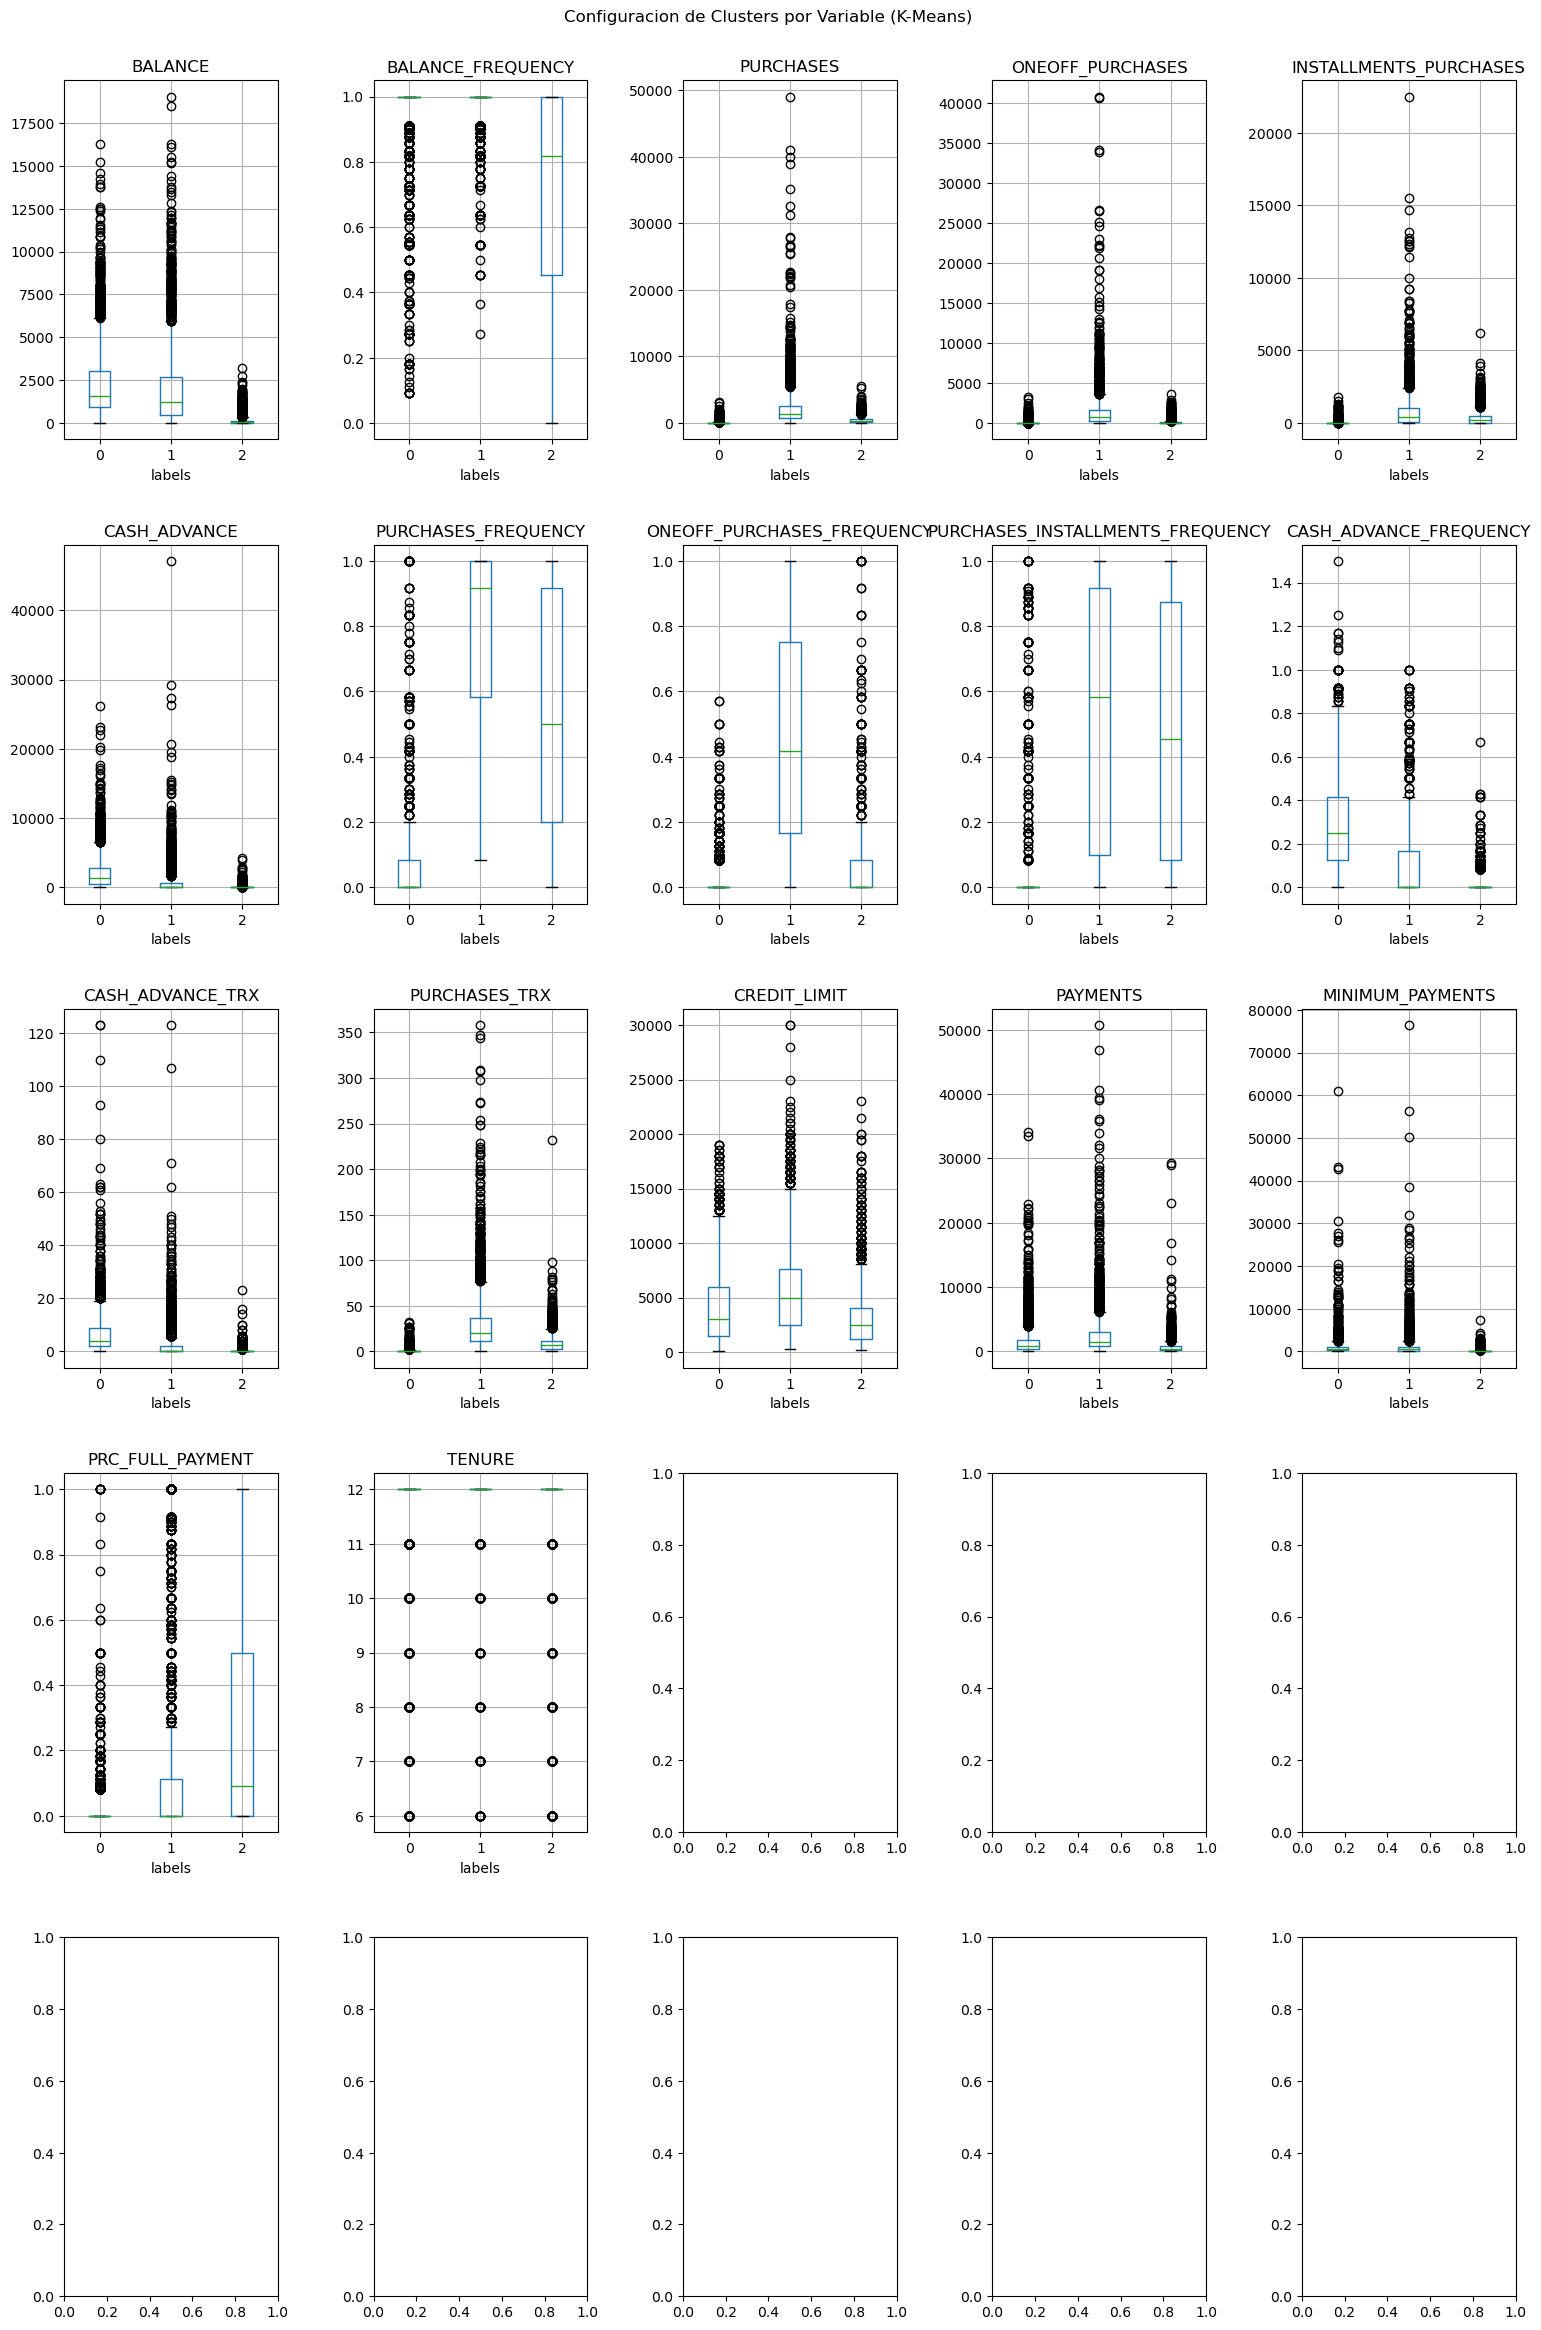

In [49]:
fig, ax = plt.subplots(nrows=5,ncols=5,figsize=(16,24))
for i,col in enumerate(cols_final):
    df_labeled.boxplot(col,'labels',ax=ax[i//5,i%5])
    #sns.boxplot(df_labeled(col),'labels',ax=ax[i//5,i%5])
fig.suptitle('Configuracion de Clusters por Variable (K-Means)')
fig.tight_layout(pad=3.0)


## Insights
- A partir de las gráfica anterior se puede extraer a grandes líneas el perfil de los 3 clusters:

### Cluster 0:
- Con respecto al balance (dinero en el banco) tienen la media más alta con un sesgo positivo. Lo cual podría indicar que 
es un grupo con un nivel socioeconomico medio-alto.
- Es el grupo con la menor cantidad de compras en promedio y la menor desviación estandar. Esto podría indicar que aunque si tienen un alto nivel de ingresos no son reconocidos como compradores compulsivos. 
- Además, en el momento en el que compran, prefieren pagar en una sola cuota en vez de generar un credito con varias cuotas futuras. Personas de una cierta edad?


#### En base al perfil: Dadas las caracteristicas dichas anteriormente, A este grupo se les podrían plantear estratégias de inversión a medio y largo plazo como estrategia de marketing. Ya que son individuos más conservadores que estan más inclinados por ahorrar en vez de gastar. 

### Cluster 1:
- Con respecto al balance (dinero en el banco) tienen la segunda media más alta muy cerca al cluster 0 con un sesgo también positivo. Lo cual podría indicar que es un grupo con un nivel socioeconomico medio-alto.
- En comparación con el cluster 0, En promedio los individuos de este grupo realizan más compras con un sesgo decidimamente positivo. Esto indica que hay una inclinación para ser catalogados como compradores compulsivos.
- Además, en el momento en el que compran, prefieren pagar a varias cuotas en vez de pagar todo de una vez. Personas jovenes?

#### En base al perfil: Dadas las caracteristicas dichas anteriormente, A este grupo se les podrían plantear estratégias de credito ("tarjetas de cerdito", "beneficios por realizar un #top de compras") como estrategia de marketing. Ya que son individuos que son más propensos a gastar. 

### Cluster 2:
- Con respecto al balance (dinero en el banco) tienen la media más baja con un sesgo nínimo positivo. Lo cual podría indicar que 
es un grupo con un nivel socioeconomico medio-bajo.

- Al no tener un alto poder adquisitivo no es notoría la cantidad de compras hechas. Sin embargo, realizan más compras de las personas del cluster 0 y prefieren pagar a cuotas.

#### En base al perfil: No es un cluster muy atractivo en términos de marketing. Tendría que hacerse un análisis al interno del cluster para entender mejor la distribución del mismo. Estratégias de credito serían bien recibidas por las personas de este cluster. Sin embargo, al no tener un alto nivel de poder adquisitivo, dichos creditos no pueden ser muy elevados y no tendrán una incidencia como lo serán para los del cluster #1 



- Si hubiesemos tenido la variable edad nos habría ayudado a perfilar mejor cada cluster.
- Para los dos primeros clusters (0 y 1) sería interesante realizar un EDA para cada uno. Ya que seguramente las propuestas de marketing hechas para el cluster 1 serían bien recibidas para algunas personas del cluster 0 y viceversa.

In [54]:
df_labeled.groupby('labels').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
labels,,,,,,,,,,,,,,,,,
0,2342.916858,0.926562,83.648346,57.947699,25.848593,2114.175998,0.080324,0.031781,0.044305,0.290455,6.871217,1.215341,4220.978611,1694.867010,1114.635516,0.028941,11.340605
1,2020.430984,0.975839,2197.835609,1408.862257,789.129117,773.717328,0.780123,0.457722,0.539898,0.103969,2.654535,30.356325,5749.366070,2590.744506,1153.475491,0.151972,11.791606
2,170.259768,0.701077,463.875876,125.003110,339.515298,43.077874,0.556263,0.060049,0.479962,0.011042,0.186968,9.172529,3198.783969,691.654536,189.136587,0.287195,11.357275


In [80]:
df_labeled.groupby('labels')['PURCHASES'].mean()

labels
0      83.648346
1    2197.835609
2     463.875876
Name: PURCHASES, dtype: float64

#### A continuación se presentan algunos gráficos que corroboran lo expresado anteriormente en los perfiles.

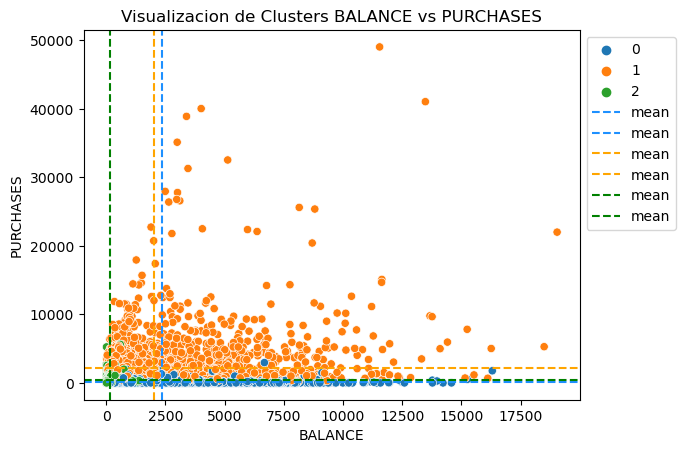

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = sns.scatterplot(x=df_labeled['BALANCE'],y=df_labeled['PURCHASES'],hue=df_labeled['labels'])#, fit_reg=False)
ax.set_title('Visualizacion de Clusters BALANCE vs PURCHASES')
colors=['dodgerblue','orange','green']
for i in range(0,3):
    ax.axhline(y=df_labeled.groupby('labels')['PURCHASES'].mean()[i],color=colors[i], ls='--', label='mean')
    ax.axvline(x=df_labeled.groupby('labels')['BALANCE'].mean()[i],color=colors[i], ls='--', label='mean')
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')
plt.show()

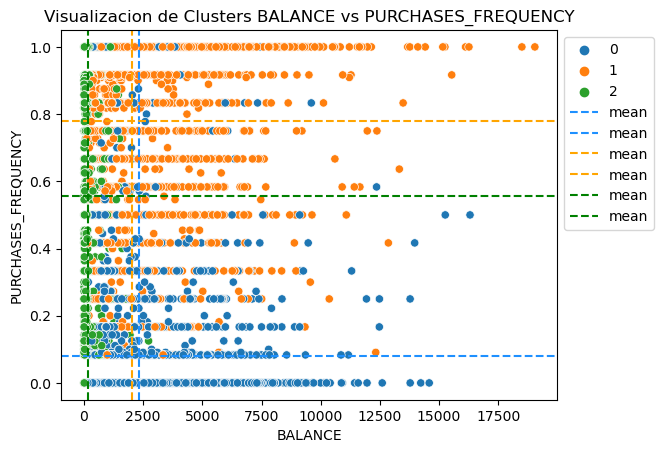

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = sns.scatterplot(x=df_labeled['BALANCE'],y=df_labeled['PURCHASES_FREQUENCY'],hue=df_labeled['labels'])#, fit_reg=False)
ax.set_title('Visualizacion de Clusters BALANCE vs PURCHASES_FREQUENCY')
colors=['dodgerblue','orange','green']
for i in range(0,3):
    ax.axhline(y=df_labeled.groupby('labels')['PURCHASES_FREQUENCY'].mean()[i],color=colors[i], ls='--', label='mean')
    ax.axvline(x=df_labeled.groupby('labels')['BALANCE'].mean()[i],color=colors[i], ls='--', label='mean')
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')
plt.show()

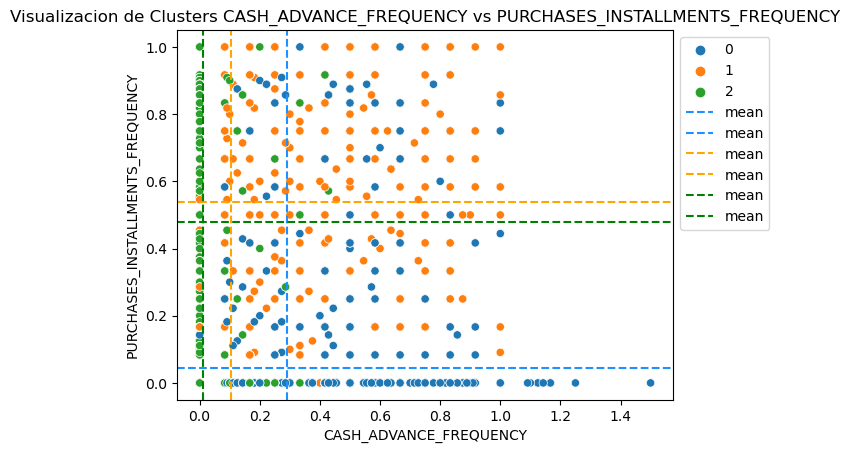

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = sns.scatterplot(x=df_labeled['CASH_ADVANCE_FREQUENCY'],y=df_labeled['PURCHASES_INSTALLMENTS_FREQUENCY'],hue=df_labeled['labels'])#, fit_reg=False)
ax.set_title('Visualizacion de Clusters CASH_ADVANCE_FREQUENCY vs PURCHASES_INSTALLMENTS_FREQUENCY')
colors=['dodgerblue','orange','green']
for i in range(0,3):
    ax.axhline(y=df_labeled.groupby('labels')['PURCHASES_INSTALLMENTS_FREQUENCY'].mean()[i],color=colors[i], ls='--', label='mean')
    ax.axvline(x=df_labeled.groupby('labels')['CASH_ADVANCE_FREQUENCY'].mean()[i],color=colors[i], ls='--', label='mean')
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')
plt.show()

### Dendogramas y validación de la calidad del fit

In [114]:
# Se genera la matriz de enlaces
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df2,'average', metric='euclidean')
Z.shape

(8949, 4)

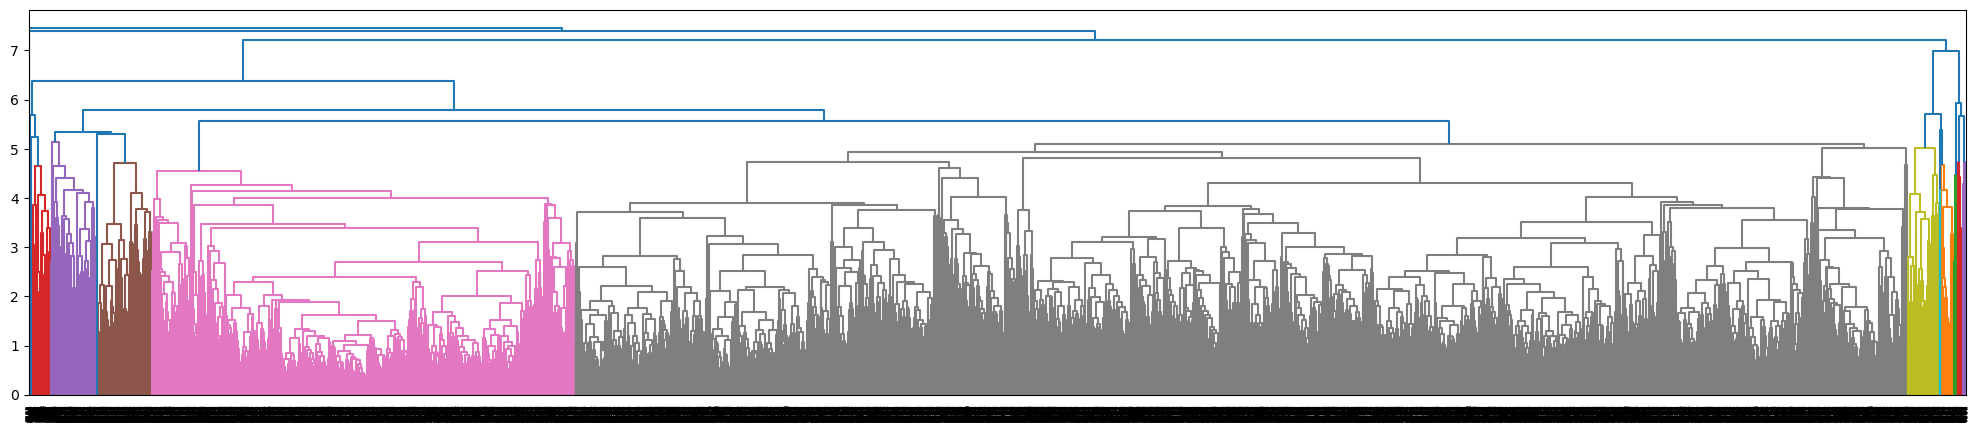

In [115]:
# Generate Dendrogram
plt.figure(figsize=(25,5))
dendrogram(Z)
plt.show()

In [116]:
# Se calculo el Coeficiente Cofenetico para validar la calidad del fit del dendograma con
# los pares de datos in ordenar
# El maximo del coeficiente es 1
c, coph_dists=cophenet(Z,pdist(df2))
print('Cophenetic Coefficient:' , format(c,'.4f'))

Cophenetic Coefficient: 0.6734


In [102]:
# Genera un dataframe para el resultado
sil_df = pd.DataFrame({},columns=['model','n_clusters','score'], index=None)

In [103]:
from sklearn.metrics import silhouette_score

# Resultado de KMeans de 2 a 10 clusters
clusters=range(2,10)
for n_clusters in clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(df2)
    centers= clusterer.cluster_centers_

    score=silhouette_score(df2,clusterer.labels_, metric='euclidean')
    # Adds result to sil_df results table
    sil_df = sil_df.append({'Model':'Kmeans','n_clusters':n_clusters,'score':score}, ignore_index=True)

Text(0.5, 1.0, 'Silhouette Score')

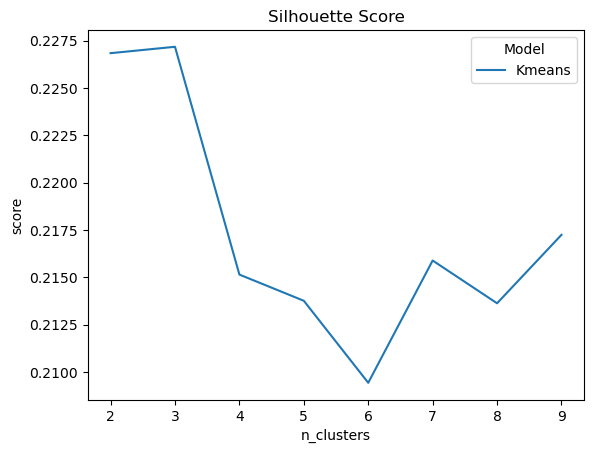

In [104]:
sns.lineplot(data=sil_df, x='n_clusters', y='score', hue='Model', style='Model', ci=None). set_title('Silhouette Score')

#### Main insights:
- Se confirma con el Silhouette Score que con k=3 se tiene el mejor desempeno